# Decision Tree

In [84]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, \
cross_val_score, RandomizedSearchCV, cross_validate

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE


In [5]:
df = pd.read_csv('../data/cleaned_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   per_gop                  3113 non-null   float64
 1   per_dem                  3113 non-null   float64
 2   per_third_party          3113 non-null   float64
 3   County_with_State        3113 non-null   object 
 4   Date                     3113 non-null   object 
 5   Series_Complete_Pop_Pct  3113 non-null   float64
 6   Metro_status             3113 non-null   int64  
 7   PCTPOVALL_2021           3113 non-null   int64  
 8   MEDHHINC_2021            3113 non-null   int64  
 9   WA                       3113 non-null   float64
 10  BA                       3113 non-null   float64
 11  IA                       3113 non-null   float64
 12  AAPI                     3113 non-null   float64
 13  MEDIAN_AGE_TOT           3113 non-null   float64
 14  through_hs              

In [7]:
y = df.target
X = df.drop(columns =['target', 'Series_Complete_Pop_Pct','County_with_State', 'Date'], axis=1) 

In [8]:
y.value_counts(normalize=True)

0    0.892708
1    0.107292
Name: target, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [10]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [11]:
dt.score(X_train, y_train)

1.0

In [12]:
dt.score(X_test, y_test)

0.8818998716302953

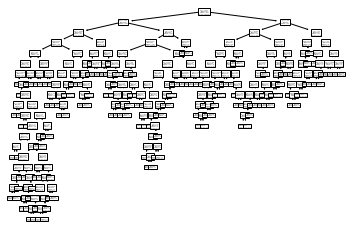

In [13]:
plot_tree(dt);

## Grid Search DT

In [14]:
grid = {'max_depth': [None, 4, 5, 6],
       'min_samples_split': [1, 2, 3],
       'min_samples_leaf': [1, 9, 10],
        
       }
grid

{'max_depth': [None, 4, 5, 6],
 'min_samples_split': [1, 2, 3],
 'min_samples_leaf': [1, 9, 10]}

In [15]:
gs = GridSearchCV(estimator=dt, scoring='precision', param_grid=grid, verbose=3, n_jobs=-3)

In [16]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  20 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-3)]: Done 180 out of 180 | elapsed:    5.0s finished


GridSearchCV(estimator=DecisionTreeClassifier(random_state=1), n_jobs=-3,
             param_grid={'max_depth': [None, 4, 5, 6],
                         'min_samples_leaf': [1, 9, 10],
                         'min_samples_split': [1, 2, 3]},
             scoring='precision', verbose=3)

In [17]:
gs.best_params_

{'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [18]:
gs.best_score_

0.7185965919884872

In [19]:
final_dt = gs.best_estimator_
final_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=1)

In [20]:
cross_validate(final_dt, X_train, y_train, scoring=['precision', 'accuracy'],return_train_score=True)

{'fit_time': array([0.02884579, 0.02222371, 0.02446198, 0.02294898, 0.02440286]),
 'score_time': array([0.00928831, 0.01023006, 0.00529003, 0.00591588, 0.00658202]),
 'test_precision': array([0.84375   , 0.56603774, 0.88888889, 0.60465116, 0.68965517]),
 'train_precision': array([0.81428571, 0.82781457, 0.78205128, 0.78313253, 0.81944444]),
 'test_accuracy': array([0.9379015 , 0.90578158, 0.93576017, 0.91006424, 0.91630901]),
 'train_accuracy': array([0.93840386, 0.94429566, 0.93840386, 0.94161757, 0.94004283])}

# Decision Tree w/ Scaling + SMOTE

In [187]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [188]:
"""
SMOTE uses nearest neighbors: finds the closest data points to the one we’re currently on, create a synthetic one based on that cluster
That’s better than just duplicating existing data (random oversampling/resampling) like we illustrated in (2) above
Since SMOTE is distance based, outliers have an effect
Might need to deal with outliers so we’re not increasing # of outliers
→  SMOTE needs scaling b/c it’s distanced based!
"""

'\nSMOTE uses nearest neighbors: finds the closest data points to the one we’re currently on, create a synthetic one based on that cluster\nThat’s better than just duplicating existing data (random oversampling/resampling) like we illustrated in (2) above\nSince SMOTE is distance based, outliers have an effect\nMight need to deal with outliers so we’re not increasing # of outliers\n→  SMOTE needs scaling b/c it’s distanced based!\n'

In [189]:
sm = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=10)
X_train_smote, y_train_smote = sm.fit_resample(X_train_scaled, y_train)

In [190]:
X_train_smote.shape

(4160, 13)

In [191]:
y_train_smote.value_counts()

1    2080
0    2080
Name: target, dtype: int64

In [192]:
X_train_scaled.shape

(2334, 13)

In [193]:
y_train.value_counts()

0    2080
1     254
Name: target, dtype: int64

In [194]:
dt2 = DecisionTreeClassifier(random_state=1)
dt2.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=1)

In [195]:
dt2.score(X_train_smote, y_train_smote)

1.0

In [196]:
dt2.score(X_test, y_test)

0.10269576379974327

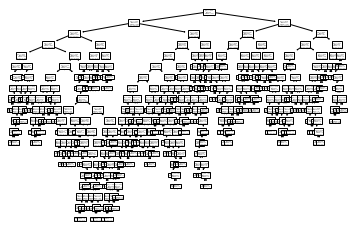

In [197]:
plot_tree(dt2);

In [198]:
# Explanation: significantly worse accuracy = model was predicting based on imbalance rather than learning 
# Accuracy of first model is about equal to class imbalance, making it about = to a dummy model that just predicted majority

In [199]:
feature_used = list(X.columns)
feature_used

['per_gop',
 'per_dem',
 'per_third_party',
 'Metro_status',
 'PCTPOVALL_2021',
 'MEDHHINC_2021',
 'WA',
 'BA',
 'IA',
 'AAPI',
 'MEDIAN_AGE_TOT',
 'through_hs',
 'college_up']

In [200]:
dt.feature_importances_
dict(zip(dt.feature_importances_, feature_used))

{0.050614391343165345: 'per_gop',
 0.2935998028931481: 'per_dem',
 0.05623659595719496: 'per_third_party',
 0.00883555420956996: 'Metro_status',
 0.029821929165728157: 'PCTPOVALL_2021',
 0.08793248484036807: 'MEDHHINC_2021',
 0.043434800012292975: 'WA',
 0.13073185868531423: 'BA',
 0.07528029658090502: 'IA',
 0.06115971215327214: 'AAPI',
 0.07818587310740721: 'MEDIAN_AGE_TOT',
 0.0465856442961025: 'through_hs',
 0.03758105675553138: 'college_up'}

In [201]:
dt2.feature_importances_
dict(zip(dt2.feature_importances_, feature_used))

{0.522731984544187: 'per_gop',
 0.04082192630774399: 'per_dem',
 0.03589834916004329: 'per_third_party',
 0.006382233983336923: 'Metro_status',
 0.06042879687938208: 'PCTPOVALL_2021',
 0.03935927466478542: 'MEDHHINC_2021',
 0.011440621566261274: 'WA',
 0.07669997401953461: 'BA',
 0.05713414111121716: 'IA',
 0.06118612235835417: 'AAPI',
 0.056878093746211174: 'MEDIAN_AGE_TOT',
 0.017537599790793883: 'through_hs',
 0.01350088186814899: 'college_up'}

# Logistic Regression

## Dummy Classifier Logreg

In [202]:
dummy_model = DummyClassifier(strategy='most_frequent')


In [203]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [204]:
dummy_model.score(X_train, y_train)

0.8911739502999143

In [205]:
dt.score(X_test, y_test)

0.8818998716302953

In [206]:
y_pred = dummy_model.predict(X_train)


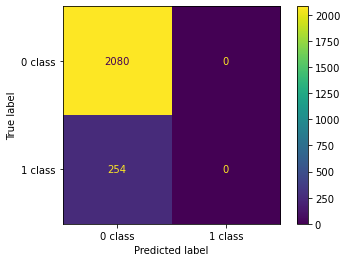

In [207]:
cm = confusion_matrix(y_train, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['0 class', '1 class']).plot()

In [208]:
precision_score(y_train, y_pred)

/Users/shelleywang/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [250]:
# Model Evaluation
cv_results0 = cross_validate(dummy_model, X_train, y_train, cv=5, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results0 = print('dummy reg \ntest precision', cv_results['test_precision'].mean(), 'test accuracy', cv_results['test_accuracy'].mean(), '\n' 'train precision', cv_results['train_precision'].mean(), 'train accuracy', cv_results['train_accuracy'].mean())

dummy reg 
test precision 0.7834315748108851 test accuracy 0.9284484105467279 
train precision 0.767796252905055 train accuracy 0.9281285232409171


/Users/shelleywang/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [210]:
dummy_model.score(X_test, y_test)

0.8973042362002568

## Simple Log Reg first

In [211]:
simple_logreg_model = LogisticRegression(random_state=1, penalty='none', max_iter=1e3)

In [212]:
# no scaling since no penalty
simple_logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000.0, penalty='none', random_state=1)

In [213]:
simple_logreg_model.predict(X_train)

array([1, 0, 1, ..., 0, 1, 0])

In [251]:
cv_results = cross_validate(simple_logreg_model, X_train, y_train, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results = print('simple log reg \n test precision', cv_results['test_precision'].mean(), 'test accuracy', cv_results['test_accuracy'].mean(), '\n' 'train precision', cv_results['train_precision'].mean(), 'train accuracy', cv_results['train_accuracy'].mean())

simple log reg 
 test precision 0.7834315748108851 test accuracy 0.9284484105467279 
train precision 0.767796252905055 train accuracy 0.9281285232409171


### Simple log reg w/ Smote

In [215]:
# fitting to smoted and scaled data now
simple_logreg_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000.0, penalty='none', random_state=1)

In [216]:
simple_logreg_model.predict(X_train_smote)

array([1, 0, 1, ..., 1, 1, 1])

In [253]:
cv_results1 = cross_validate(simple_logreg_model, X_train_smote, y_train_smote, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results1 = print('logreg smote \ntest precision', cv_results1['test_precision'].mean(), 'test accuracy', cv_results1['test_accuracy'].mean(),'\ntrain precision', cv_results1['train_precision'].mean(), 'train accuracy', cv_results1['train_accuracy'].mean())

logreg smote 
test precision 0.8713747647541219 test accuracy 0.8754807692307693 
train precision 0.8678197123869055 train accuracy 0.8721754807692308


In [218]:
y_pred_smote = simple_logreg_model.predict(X_train_smote)

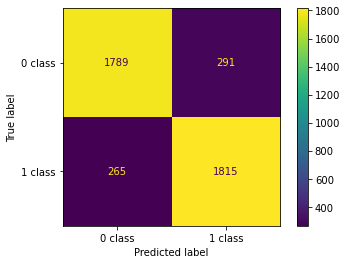

In [219]:
cm = confusion_matrix(y_train_smote, y_pred_smote)
ConfusionMatrixDisplay(cm, display_labels=['0 class', '1 class']).plot()

## Log Reg w/ Regularization

In [220]:
logreg_model = LogisticRegression(random_state=1, penalty='l2', max_iter=1e3)

In [221]:
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000.0, random_state=1)

In [222]:
logreg_model.predict(X_train_scaled)

array([1, 0, 1, ..., 0, 1, 0])

In [254]:
cv_results2 = cross_validate(logreg_model, X_train_scaled, y_train, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results2 = print('logreg regularized \ntest precision', cv_results2['test_precision'].mean(), 'test accuracy', cv_results2['test_accuracy'].mean(), '\ntrain precision', cv_results2['train_precision'].mean(), 'train accuracy', cv_results2['train_accuracy'].mean())

logreg regularized 
test precision 0.7535844280240832 test accuracy 0.9241657553004752 
train precision 0.7606176835951772 train accuracy 0.925878695567899


In [224]:
y_pred_regularized = logreg_model.predict(X_train_scaled)

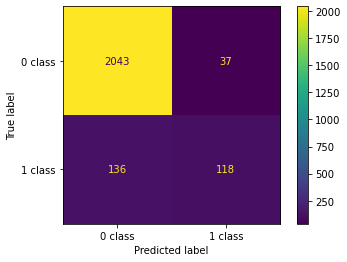

In [225]:
cm = confusion_matrix(y_train, y_pred_regularized)
ConfusionMatrixDisplay(cm, display_labels=['0 class', '1 class']).plot()

### Logreg w/ Regularization on SMOTE

In [226]:
logreg_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000.0, random_state=1)

In [227]:
logreg_model.predict(X_train_smote)

array([1, 0, 1, ..., 1, 1, 1])

In [256]:
cv_results3 = cross_validate(logreg_model, X_train_smote, y_train_smote, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results3 = print('logreg w/ reg & smote \ntest precision', cv_results3['test_precision'].mean(), 'test accuracy', cv_results3['test_accuracy'].mean(), '\ntrain precision', cv_results3['train_precision'].mean(), 'train accuracy', cv_results3['train_accuracy'].mean())

logreg w/ reg & smote 
test precision 0.8540348505446683 test accuracy 0.8560096153846153 
train precision 0.8539332628572509 train accuracy 0.8561899038461538


In [229]:
y_pred_reg_smote = logreg_model.predict(X_train_smote)

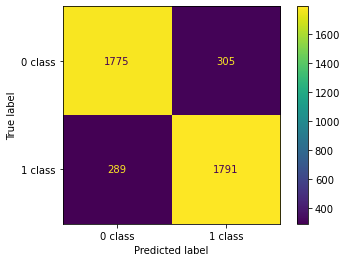

In [230]:
cm = confusion_matrix(y_train_smote, y_pred_reg_smote)
ConfusionMatrixDisplay(cm, display_labels=['0 class', '1 class']).plot()

## Logreg w/ Class Weight

In [231]:
logreg_cw_model = LogisticRegression(class_weight='balanced', random_state=3, penalty='l2', max_iter=1e3)

In [232]:
logreg_cw_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000.0, random_state=3)

In [233]:
logreg_cw_model.predict(X_train_scaled)

array([1, 0, 1, ..., 1, 1, 0])

In [263]:
cv_results4 = cross_validate(logreg_cw_model, X_train_scaled, y_train, scoring=['precision', 'accuracy'],return_train_score=True)
cv_results4 = print('logreg w/ class weight \ntest precision', cv_results4['test_precision'].mean(), 'test accuracy', cv_results4['test_accuracy'].mean(), '\ntrain precision', cv_results4['train_precision'].mean(), 'train accuracy', cv_results4['train_accuracy'].mean())

logreg w/ class weight 
test precision 0.4017565914445692 test accuracy 0.8453253807059948 
train precision 0.3969828787099982 train accuracy 0.8439372443051809


In [235]:
y_pred_cw = logreg_cw_model.predict(X_train_scaled)

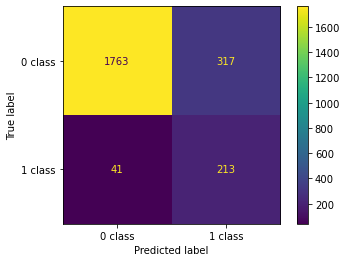

In [236]:
cm = confusion_matrix(y_train, y_pred_cw)
ConfusionMatrixDisplay(cm, display_labels=['0 class', '1 class']).plot()

'logreg w/ class weight \ntest precision 0.4017565914445692 test accuracy 0.8453253807059948 \ntrain precision 0.3969828787099982 train accuracy 0.8439372443051809'

In [265]:
cv_results4

## Grid Search the CW Log Reg Model

In [281]:
weights = np.linspace(0.0,0.99,10)
vals = [{0:x, 1:1.0-x} for x in weights]

grid2 = {'class_weight': ['balanced', None, vals],
       'max_iter': [10, 100, 200],
       'C': [50, 100, 200],
       }
grid2

{'class_weight': ['balanced',
  None,
  [{0: 0.0, 1: 1.0},
   {0: 0.11, 1: 0.89},
   {0: 0.22, 1: 0.78},
   {0: 0.33, 1: 0.6699999999999999},
   {0: 0.44, 1: 0.56},
   {0: 0.55, 1: 0.44999999999999996},
   {0: 0.66, 1: 0.33999999999999997},
   {0: 0.77, 1: 0.22999999999999998},
   {0: 0.88, 1: 0.12},
   {0: 0.99, 1: 0.010000000000000009}]],
 'max_iter': [10, 100, 200],
 'C': [50, 100, 200]}

In [282]:
gs2 = GridSearchCV(estimator=logreg_cw_model, scoring='precision', param_grid=grid2, verbose=3, n_jobs=-3)

In [283]:
gs2.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done  28 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-3)]: Done 124 out of 135 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-3)]: Done 135 out of 135 | elapsed:    3.3s finished


GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000.0, random_state=3),
             n_jobs=-3,
             param_grid={'C': [50, 100, 200],
                         'class_weight': ['balanced', None,
                                          [{0: 0.0, 1: 1.0}, {0: 0.11, 1: 0.89},
                                           {0: 0.22, 1: 0.78},
                                           {0: 0.33, 1: 0.6699999999999999},
                                           {0: 0.44, 1: 0.56},
                                           {0: 0.55, 1: 0.44999999999999996},
                                           {0: 0.66, 1: 0.33999999999999997},
                                           {0: 0.77, 1: 0.22999999999999998},
                                           {0: 0.88, 1: 0.12},
                                           {0: 0.99, 1: 0.010000000000000009}]],
                         'max_iter': [10, 100, 200]},
           

In [284]:
gs2.best_params_

{'C': 100, 'class_weight': None, 'max_iter': 100}

In [285]:
gs2.best_score_

0.7724724724724725

In [286]:
final_model = gs2.best_estimator_
final_model

LogisticRegression(C=100, random_state=3)